In [ ]:
!pip install transformers datasets evaluate -q
!pip install jiwer -q
#!pip uninstall pyarrow
!pip install pyarrow
!pip install transformers[torch]
#y!pip uninstall accelerate
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but yo

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from datasets import load_dataset, DatasetDict

ds = load_dataset("TheFusion21/PokemonCards")
ds = ds["train"].train_test_split(test_size=0.1)
train_ds = ds["train"]
test_ds = ds["test"]



Generating train split:   0%|          | 0/13139 [00:00<?, ? examples/s]

In [ ]:
print(train_ds[0])

{'id': 'hgss1-10', 'image_url': 'https://images.pokemontcg.io/hgss1/10_hires.png', 'caption': 'A Stage 1 Pokemon Card of type Lightning with the title Raichu and 90 HP of rarity Rare Holo evolved from Pikachu from the set HeartGold & SoulSilver and the flavor text: If the electric pouches in its cheeks become fully charged, both ears will stand straight up. It has the attack Iron Tail with the cost Colorless, the energy cost 1 and the damage of 30 with the description: Flip a coin until you get tails. This attack does 30 damage times the number of heads. It has the attack Thunderbolt with the cost Lightning, Lightning, the energy cost 2 and the damage of 100 with the description: Discard all Energy attached to Raichu. It has weakness against Fighting 2. It has resistance against Metal -20. ', 'name': 'Raichu', 'hp': 90, 'set_name': 'HeartGold & SoulSilver'}


<ipython-input-4-55f2aab1a6ec>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imread(f)
<ipython-input-4-55f2aab1a6ec>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imread(f)


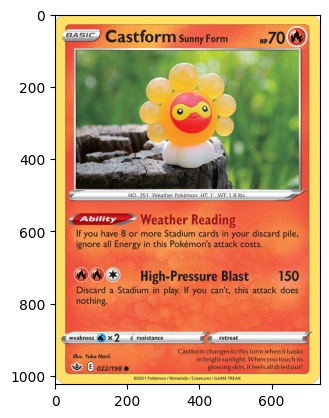

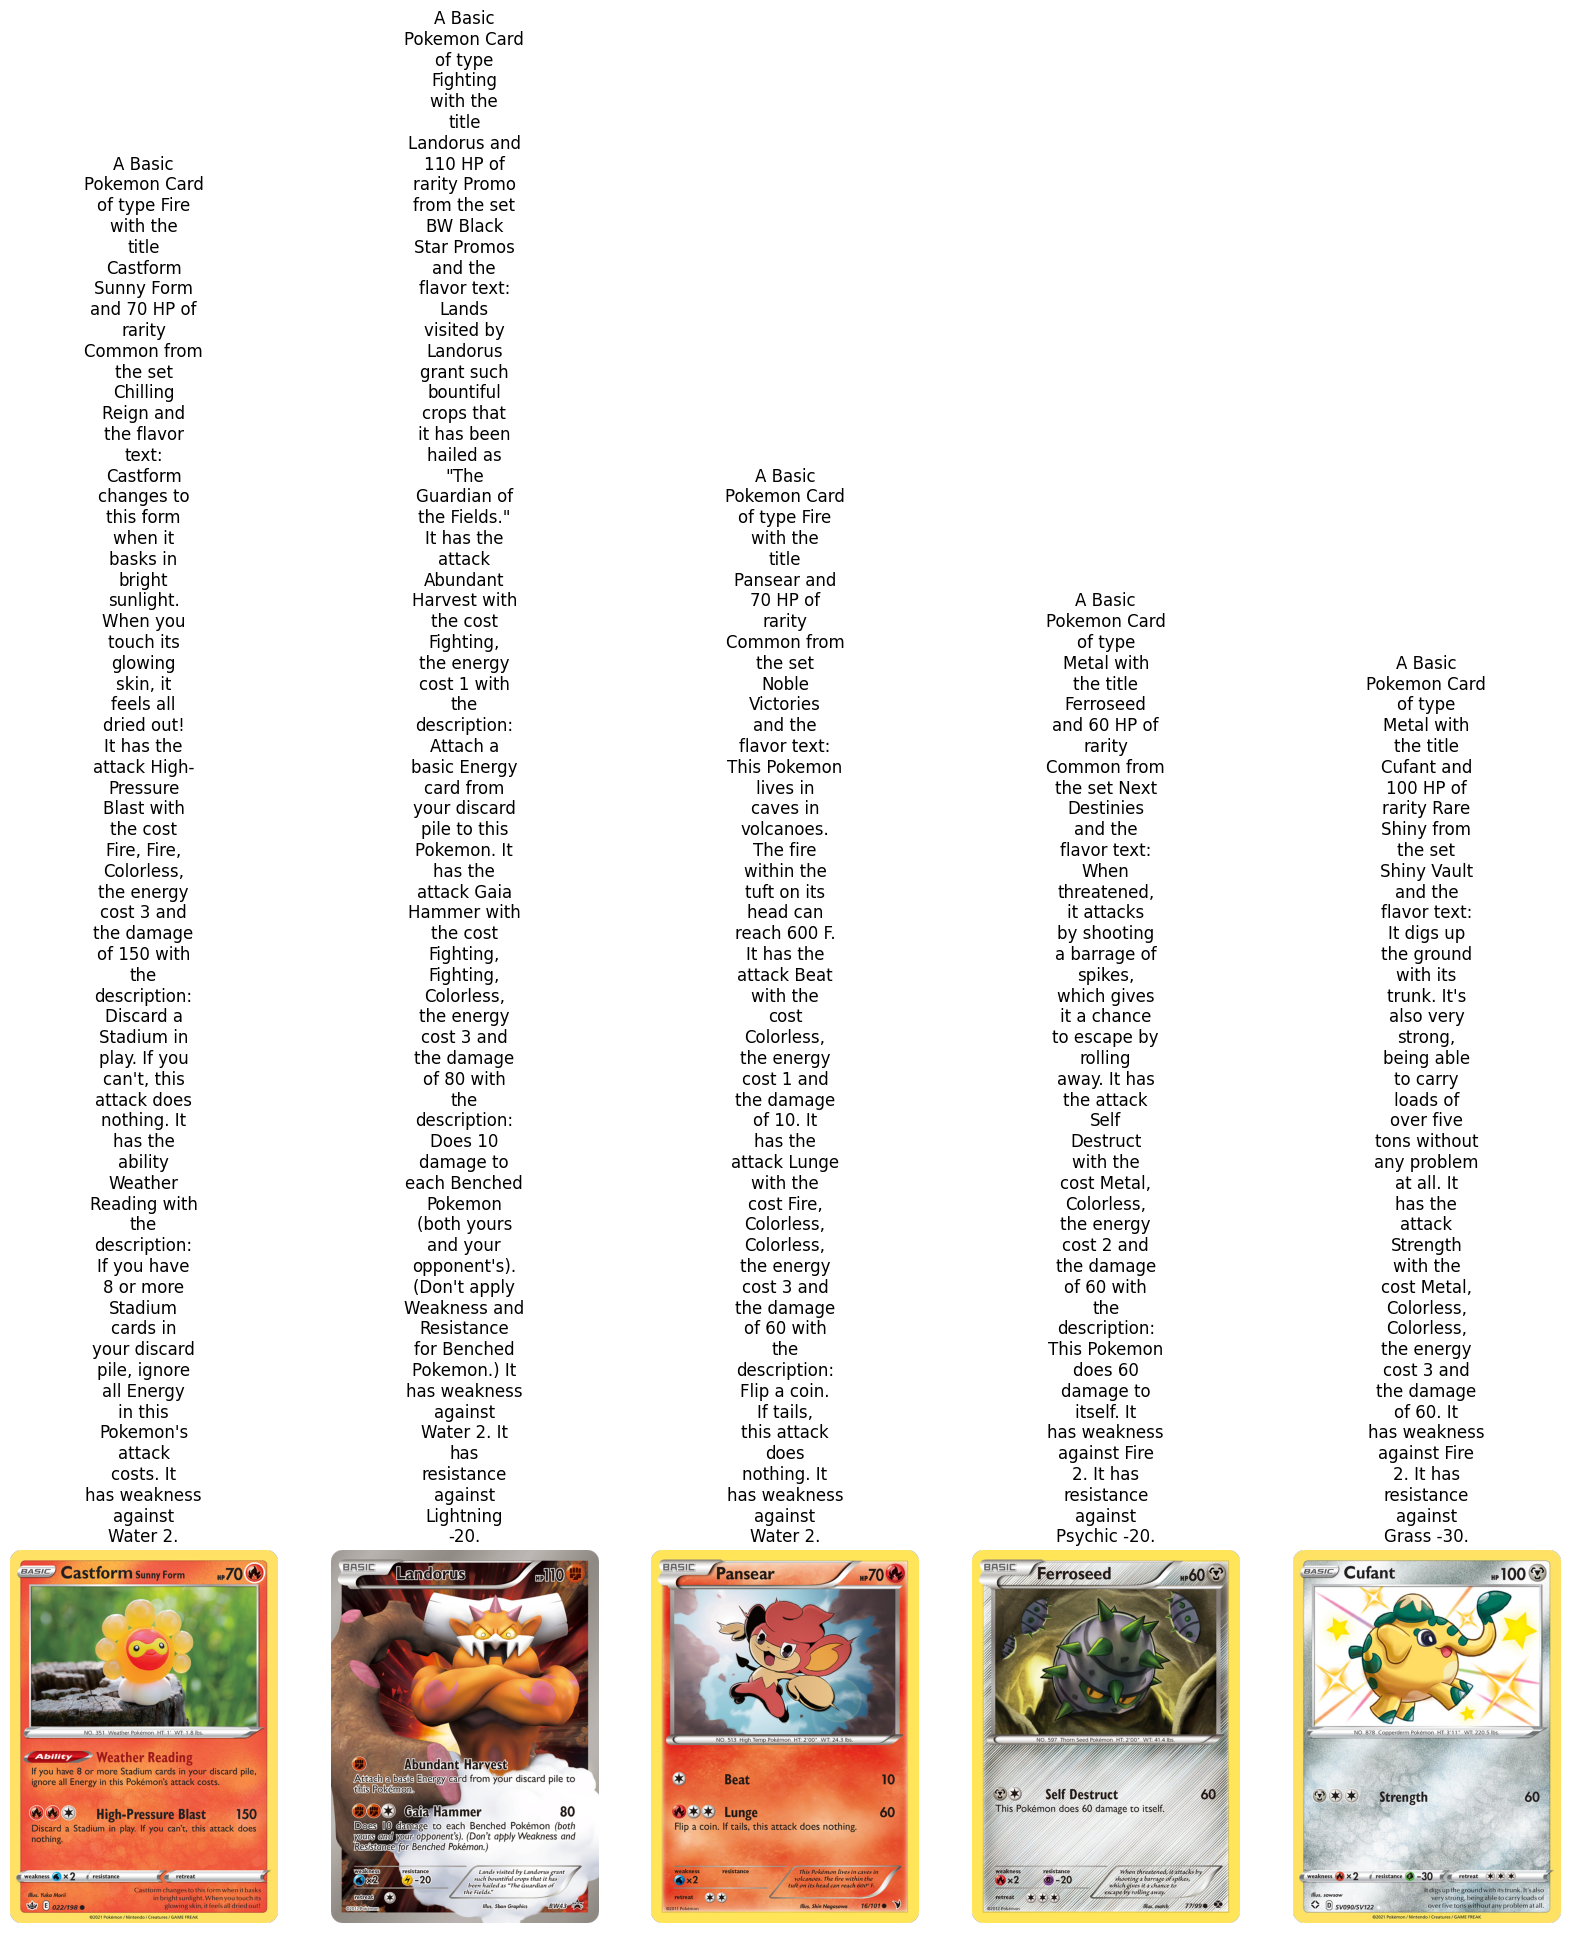

In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from imageio import imread

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()

a = imread(f)
plt.imshow(a)
#plt.show()


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)

        req = urllib.request.Request(images[i], headers={'User-Agent': 'Chrome/47.0.2526.106'})
        f = urllib.request.urlopen(req).read()

        a = imread(f)
        plt.imshow(a)

        plt.axis("off")


sample_images_to_visualize = [np.array(train_ds[i]["image_url"]) for i in range(5)]
sample_captions = [train_ds[i]["caption"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_captions)


In [ ]:
from transformers import AutoProcessor

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
print (type(processor))

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()

a = imread(f)

processor

<class 'transformers.models.git.processing_git.GitProcessor'>


<ipython-input-5-7dc334adb176>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imread(f)


GitProcessor:
- image_processor: CLIPImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_center_crop",
    "crop_size",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "do_convert_rgb",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "GitProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

- tokenizer: BertTokenizerFast(name_or_path='microsoft/git-base', vocab_size=30522, model_max_length=512, is_fast=True, padding_si

In [ ]:
import sys

reqimages = []
reqDict = dict()
for x in train_ds["image_url"]:
    req = urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'})
    f = urllib.request.urlopen(req).read()
    reqDict[f] = x
    try:
        Image.open(f).getdata()
        reqimages.append(f)
        print(type(f))
        print( sys.getsizeof(f))
    except Exception as e:
        continue
print(len(reqimages))
rgb_values = np.concatenate([Image.open(img).getdata() for img in reqimages], axis=0) / 255

# rgb_values.shape == (n, 3),
# where n is the total number of pixels in all images,
# and 3 are the 3 channels: R, G, B.

# Each value is in the interval [0; 1]

mu_rgb = np.mean(rgb_values, axis=0)  # mu_rgb.shape == (3,)
std_rgb = np.std(rgb_values, axis=0)  # std_rgb.shape == (3,)

print(mu_rgb)
print(std_rgb)

In [ ]:
from PIL import Image
#import numpy as np

def transforms(example_batch):

    #imgpath = []
    #for x in example_batch["image_url"]:
     # img =Image.open(urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'}))
     # imgpath.append(img)
    print(type(example_batch))

    #plt.imshow(reqimages[0])

    images = [x for x in reqimages]
    #print(type(images))
    captions = [x for x in example_batch["caption"]]
    #inputs = processor(images=images, text=captions, padding="max_length")
    imgProcessor = processor.image_processor
    txtTokenizer = processor.tokenizer
    txtTokenizer.padding_side = "left"
    txtTokenizer.truncation_side = "left"

    #imgProcessor.do_normalize(True)
    # rgb_values.shape == (n, 3),
    # where n is the total number of pixels in all images,
    # and 3 are the 3 channels: R, G, B.

    # Each value is in the interval [0; 1]


    imgProcessor.preprocess(images=images,image_mean=mu_rgb, image_std=std_rgb)

    inputs = processor(images=images, text=captions, return_tensors="pt", padding="longest")
    inputs.update({"labels": inputs["input_ids"]})
    print(inputs.pop("pixel_values"))
    return inputs


train_ds.set_transform(transforms)
test_ds.set_transform(transforms)

In [ ]:
print(train_ds.shape)
print(test_ds.shape)

(11825, 6)
(1314, 6)


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model = AutoModelForCausalLM.from_pretrained(checkpoint)
# Load the tokenizer associated with the model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Tokenize the input text
inputs = tokenizer("Hello, world!", return_tensors="pt")

# Get the input IDs
input_ids = inputs["input_ids"]

# Forward pass
#model.forward(input_ids=input_ids, pixel_values=torch.randn(1, 3, 224, 224))


#model_config = model.config
#model_config.
#print(model.config)


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
from evaluate import load
import torch

wer = load("wer")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

In [ ]:
#!pip uninstall transformers[torch]

from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"{model_name}-pokemon",
    learning_rate=5e-5,
    num_train_epochs=50,
    fp16=True,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

<class 'dict'>
Error opening image embedded null byte: https://images.pokemontcg.io/swsh5/1_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/xy9/73_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/sm6/95_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/swshp/SWSH023_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/bw3/89_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/ex11/74_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/bw1/47_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/bw6/124_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/sm11/6_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/sma/SV33_hires.png
Error opening image embedded null byte: https://images.pokemontcg.io/ecard1/115_hires.png
Error opening image emb

ValueError: need at least one array to concatenate